In [1]:
# import pandas & numpy library
import numpy as np
import pandas as pd
# Import seaborn and apply its plotting styles
import seaborn as sns
from scipy.stats import zscore

from datetime import datetime
from dateutil import parser


sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

ModuleNotFoundError: No module named 'scipy'

In [ ]:
df = pd.read_csv("American Films.csv")
df

,Film name,Genre,Plot,Directed by,Written by,Story by,Produced by,Starring,Cinematography,Edited by,...,Budget (mil dollar),Box office (mil dollar),VADER Sentiment,VADER negative,VADER neutral,VADER positive,VADER compound,VADER compound (absolute value),TextBlob subjectivity,TextBlob polarity
0,The 2nd (film),Action,"While picking up his son at his college dorm, ...",Brian Skiba,Eric Bromberg/ Paul Taegel,NaN,Geoffrey James Clark/ Ryan Phillippe/ Kirk Sha...,Ryan Phillippe/ Casper Van Dien/ Jack Griffo/ ...,Adam Biddle,Scott Conrad,...,NaN,0.012604,"{'neg': 0.056, 'neu': 0.804, 'pos': 0.139, 'co...",0.056,0.804,0.139,0.7845,0.7845,0.450000,0.016667
1,12 Rounds (film),Action,A sting operation to capture arms dealer Miles...,Renny Harlin,Daniel Kunka,NaN,Becki Cross Trujillo/ Mark Gordon/ Renny Harli...,John Cena/ Aidan Gillen/ Ashley Scott/ Steve H...,David Boyd,Brian Berdan,...,6.70,17.300000,"{'neg': 0.071, 'neu': 0.873, 'pos': 0.056, 'co...",0.071,0.873,0.056,-0.9610,0.9610,0.385748,-0.084798
2,13 Minutes (2021 film),Action,Four families in the fictional Oklahoma town o...,Lindsay Gossling,Lindsay Gossling,Travis Farncombe,Lindsay Gossling/ Travis Farncombe/ Karen Harn...,Trace Adkins/ Thora Birch/ Peter Facinelli/ An...,Steve Mason,Lisa Grootenboer,...,NaN,0.067413,"{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'comp...",0.263,0.737,0.000,-0.9524,0.9524,0.431250,-0.031250
3,Aces: Iron Eagle III,Action,U.S. Air Force Brigadier General Charles 'Chap...,John Glen,Kevin Alyn Elders,NaN,Ron Samuels,Louis Gossett Jr./ Rachel McLish/ Paul Freeman...,Alec Mills,Bernard Gribble,...,13.50,2.500000,"{'neg': 0.088, 'neu': 0.861, 'pos': 0.051, 'co...",0.088,0.861,0.051,-0.9872,0.9872,0.338125,-0.053258
4,American Ninja,Action,"As an alternative to prison, young American Jo...",Sam Firstenberg,Paul De Mielche (screenplay)/ Gideon Amir (sto...,NaN,Yoram Globus/ Menahem Golan,Michael Dudikoff/ Guich Knock/ Judie Aronson,Hanania Baer,Andy Horvitch/ Peter Lee-Thompson/ Marcus Mant...,...,1.00,10.499694,"{'neg': 0.161, 'neu': 0.789, 'pos': 0.05, 'com...",0.161,0.789,0.050,-0.9981,0.9981,0.429046,-0.088511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,The Young Messiah,Drama,Seven-year-old Jesus is playing in Alexandria ...,Cyrus Nowrasteh,Cyrus Nowrasteh/ Betsy Giffen Nowrasteh,NaN,Michael Barnathan/ Chris Columbus/ Tracy K. Pr...,Adam Greaves-Neal/ Sean Bean/ David Bradley/ L...,Joel Ransom,Geoffrey Rowland,...,18.50,7.300000,"{'neg': 0.131, 'neu': 0.807, 'pos': 0.062, 'co...",0.131,0.807,0.062,-0.9946,0.9946,0.377682,0.033788
2490,The Young Philadelphians,Drama,Newlywed Kate Judson Lawrence (Diane Brewster)...,Vincent Sherman,NaN,NaN,James Gunn,Paul Newman/ Barbara Rush/ Alexis Smith/ Rober...,Harry Stradling,William H. Ziegler,...,NaN,2.800000,"{'neg': 0.149, 'neu': 0.704, 'pos': 0.147, 'co...",0.149,0.704,0.147,-0.5300,0.5300,0.472809,0.126522
2491,Zabriskie Point (film),Drama,"In a room at a university campus in 1970, whit...",Michelangelo Antonioni,NaN,Michelangelo Antonioni,Carlo Ponti,Mark Frechette/ Daria Halprin/ Rod Taylor,Alfio Contini,Franco Arcalli,...,7.00,1.000000,"{'neg': 0.117, 'neu': 0.801, 'pos': 0.082, 'co...",0.117,0.801,0.082,-0.9864,0.9864,0.375393,0.044276
2492,Zero Day (2003 film),Drama,"Andre Kriegman (Born July 17, 1982) and Calvin...",Ben Coccio,Ben Coccio/ Christopher Coccio,NaN,Ben Coccio,Andre Keuck/ Cal Robertson,NaN,NaN,...,0.02,0.008466,"{'neg': 0.112, 'neu': 0.849, 'pos': 0.039, 'co...",0.112,0.849,0.039,-0.9855,0.9855,0.467303,0.135424


In [ ]:
genres = df['Genre'].value_counts()

<AxesSubplot:>

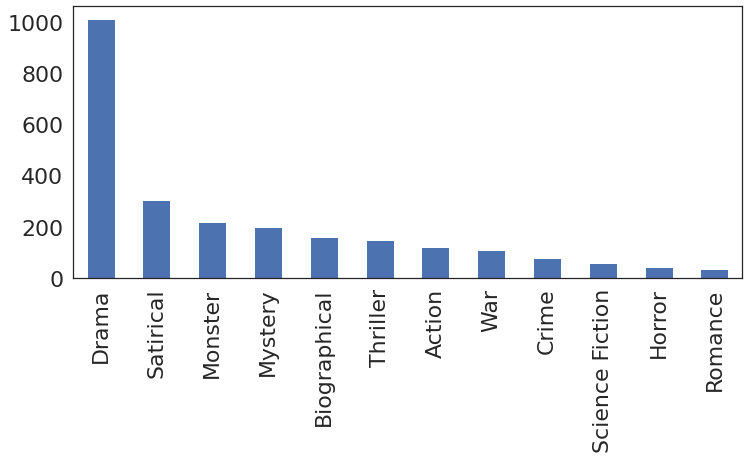

In [ ]:
genres.plot.bar()

In [ ]:
# Prepare a dataframe 
df2 = df[['Genre','Box office (mil dollar)']]
total_mean = df2['Box office (mil dollar)'].mean()
genres = ['Drama','Satirical','Monster','Monster','Mystery','Biographical','Thriller','Action','War','Crime','Science Fiction','Horror','Romance']
new = pd.DataFrame(columns=['Genres','Box Office'])



#A function that takes a list of box office stats and calculate the z score
def z_score_table(genre):
    
    new = pd.DataFrame(columns=['Genres','Mean Box Office'])
    for items in genre:

        New_Genre = df2[df2['Genre'] == items]
        New_Genre_mean = New_Genre['Box office (mil dollar)'].mean()
        #print(New_Genre_mean)
        dict = {'Genres': items, 'Mean Box Office': [New_Genre_mean]}
        row = pd.DataFrame(dict)
        new = pd.concat([new,row])


    return new

df3 = z_score_table(genres)
df3['Box Office Z-Score'] = zscore(df3['Mean Box Office'])
df3

,Genres,Mean Box Office,Box Office Z-Score
0,Drama,10.459604,-1.088139
0,Satirical,43.176346,0.025463
0,Monster,84.384734,1.428101
0,Monster,84.384734,1.428101
0,Mystery,37.168484,-0.179031
0,Biographical,25.900356,-0.562572
0,Thriller,22.922987,-0.663914
0,Action,98.458297,1.907132
0,War,12.975196,-1.002514
0,Crime,24.665517,-0.604603


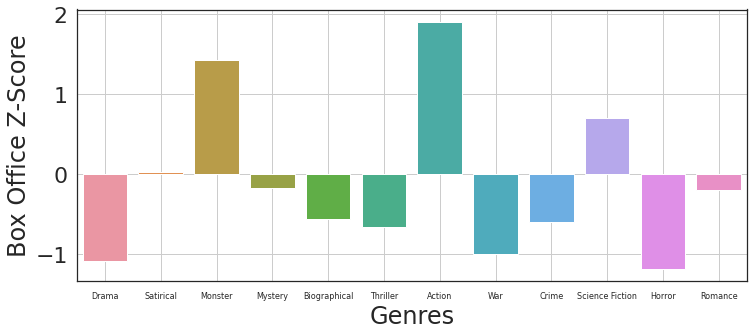

In [ ]:
# plotting the z score
ax = sns.barplot(data=df3, x="Genres", y="Box Office Z-Score")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.grid()
plt.show()

We can see that Action movies does perform better than other genres. The second runner up are Monster movies and science fiction.

# What are the trends for profits across the Years with different movie genres?

#### We first extract the Genre, Date and the Box Office Column

In [ ]:
df4 = df.iloc[:,[1,13,20]]
df4

,Genre,Release date,Box office (mil dollar)
0,Action,"September 1, 2020",0.012604
1,Action,NaN,17.300000
2,Action,"October 29, 2021",0.067413
3,Action,NaN,2.500000
4,Action,"August 30, 1985",10.499694
...,...,...,...
2489,Drama,"March 11, 2016",7.300000
2490,Drama,"May 19, 1959",2.800000
2491,Drama,NaN,1.000000
2492,Drama,"September 3, 2003",0.008466


#### We want to analyse the year of the release dates. So let's clean up the data.

In [ ]:
df4.dtypes

Genre                       object
Release date                object
Box office (mil dollar)    float64
dtype: object

#### Drop any blank rows

In [ ]:
df4 = df4.dropna()
df4

,Genre,Release date,Box office (mil dollar)
0,Action,"September 1, 2020",0.012604
2,Action,"October 29, 2021",0.067413
4,Action,"August 30, 1985",10.499694
5,Action,"May 1, 1987",4.000000
6,Action,"February 24, 1989)",1.556606
...,...,...,...
2486,Drama,"October 10, 2014",0.894964
2487,Drama,"December 25, 2003",9.638389
2489,Drama,"March 11, 2016",7.300000
2490,Drama,"May 19, 1959",2.800000


In [ ]:
df4['Release date'].unique()

array(['September\xa01,\xa02020', 'October\xa029,\xa02021',
       'August\xa030,\xa01985', ..., 'March\xa011,\xa02016',
       'May\xa019,\xa01959', 'September\xa03,\xa02003'], dtype=object)

#### Let's try and extract the year from the date string

In [ ]:
def get_year(date_string):
    try:
        res = parser.parse(date_string, fuzzy=True).year
        return res
    except:
        return np.nan

In [ ]:
df4['Release date'] = df4['Release date'].apply(get_year)
df4 = df4.dropna()
df4

/tmp/ipykernel_7352/1463209556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Release date'] = df4['Release date'].apply(get_year)


,Genre,Release date,Box office (mil dollar)
0,Action,2020.0,0.012604
2,Action,2021.0,0.067413
4,Action,1985.0,10.499694
5,Action,1987.0,4.000000
6,Action,2022.0,1.556606
...,...,...,...
2486,Drama,2014.0,0.894964
2487,Drama,2003.0,9.638389
2489,Drama,2016.0,7.300000
2490,Drama,1959.0,2.800000


#### Remove the trailing zeros by converting it into an int

In [ ]:
df4['Release date'] = df4['Release date'].astype(int)
df4

/tmp/ipykernel_7352/3664585601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Release date'] = df4['Release date'].astype(int)


,Genre,Release date,Box office (mil dollar)
0,Action,2020,0.012604
2,Action,2021,0.067413
4,Action,1985,10.499694
5,Action,1987,4.000000
6,Action,2022,1.556606
...,...,...,...
2486,Drama,2014,0.894964
2487,Drama,2003,9.638389
2489,Drama,2016,7.300000
2490,Drama,1959,2.800000


In [ ]:
def calculate_mean(Genre, new):
    # Select all that are from year 2020
    df_action = df4[df4['Genre'] == Genre]
    year_list = df_action['Release date'].unique()

    for years in year_list:
        df_action_year = df_action[df_action['Release date'] == years]
        genre_year_mean = df_action_year['Box office (mil dollar)'].mean()
        dict_2 = {'Genres': Genre, 'Mean Box Office': [genre_year_mean],'year': years}
        #Create new dataframe
        row = pd.DataFrame(dict_2)
        new = pd.concat([new,row])

    return new

In [ ]:
genre_list = df4['Genre'].unique()
new = pd.DataFrame(columns=['Genres','Mean Box Office','year'])
print(genre_list)
for genre in genre_list:
    new = calculate_mean(genre,new) 
new

['Action' 'Crime' 'War' 'Romance' 'Thriller' 'Horror' 'Biographical'
 'Satirical' 'Science Fiction' 'Monster' 'Mystery' 'Drama']


,Genres,Mean Box Office,year
0,Action,0.176207,2020
0,Action,0.059791,2021
0,Action,96.474923,1985
0,Action,5.367081,1987
0,Action,0.539422,2022
...,...,...,...
0,Drama,1.615000,1968
0,Drama,24.987600,1995
0,Drama,0.676559,1935
0,Drama,0.938000,1926


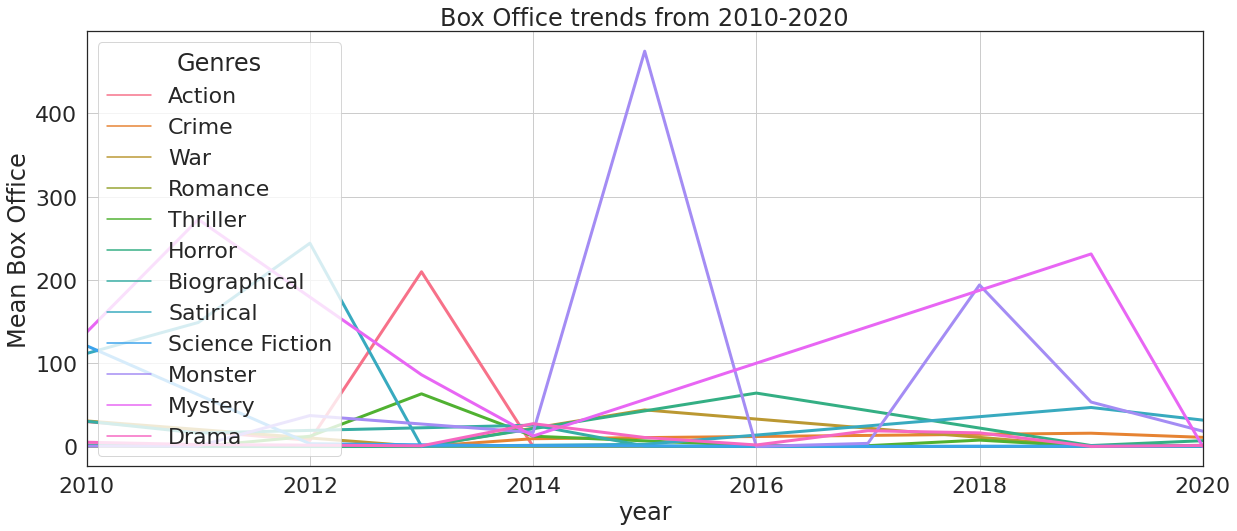

In [ ]:
f1, ax = plt.subplots(figsize =(20, 8))
plt.xlim(2010, 2020)
f1 = sns.lineplot(data=new, x="year", y="Mean Box Office", hue='Genres',legend='brief',linewidth = 3).set(title="Box Office trends from 2010-2020")
plt.grid()

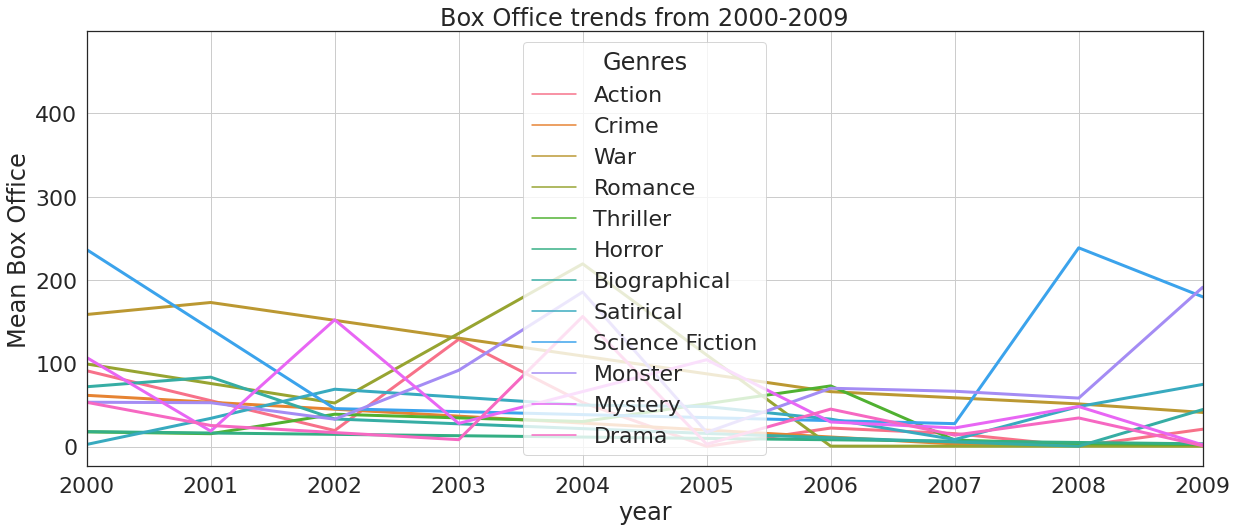

In [ ]:
f2, ax = plt.subplots(figsize =(20, 8))
plt.xlim(2000, 2009)
f2 = sns.lineplot(data=new, x="year", y="Mean Box Office", hue='Genres',legend='brief',linewidth=3).set(title="Box Office trends from 2000-2009")
plt.grid()

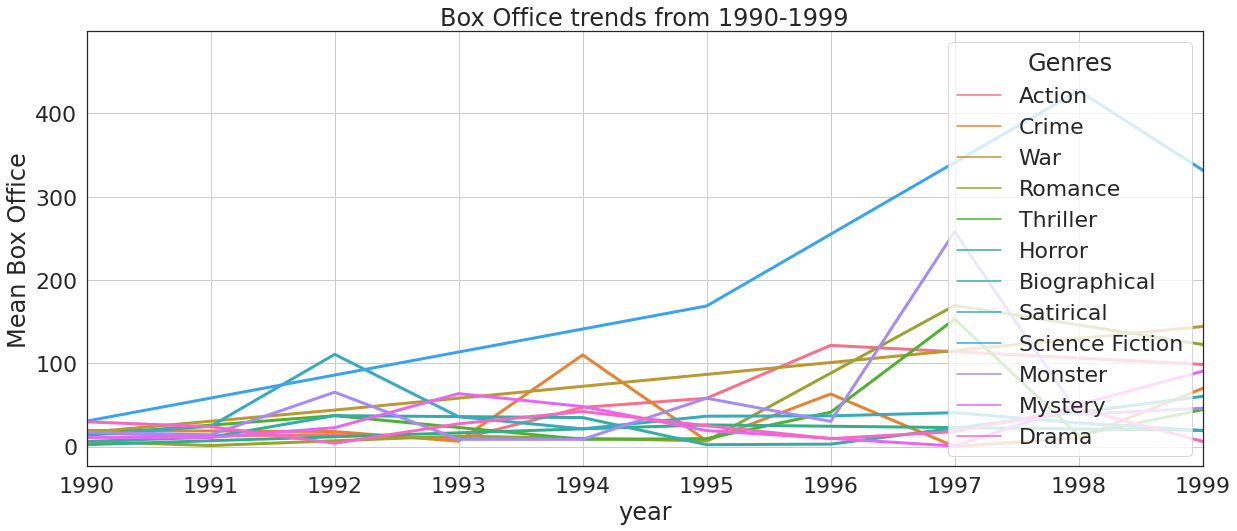

In [ ]:
f3, ax = plt.subplots(figsize =(20, 8))
plt.xlim(1990, 1999)
f3 = sns.lineplot(data=new, x="year", y="Mean Box Office", hue='Genres',legend='brief', linewidth=3).set(title="Box Office trends from 1990-1999")
plt.grid()

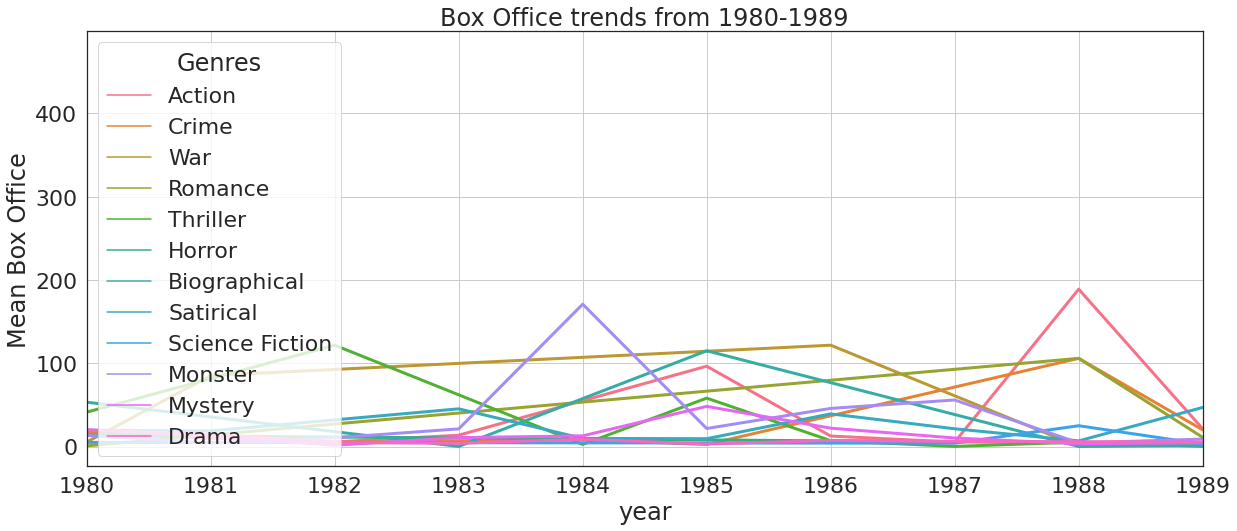

In [ ]:
f4, ax = plt.subplots(figsize =(20, 8))
plt.xlim(1980, 1989)
f4 = sns.lineplot(data=new, x="year", y="Mean Box Office", hue='Genres',legend='brief',linewidth=3).set(title="Box Office trends from 1980-1989")
plt.grid()

Science Fiction, Monster films are perfoming much better than other genres